##**Problem Statement: Analyze agricultural prices for sales timing insights**

##Step 1: Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, linregress
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/agricultural-dataset')

##Step 2: Data Cleaning and Preprocessing

In [ ]:
data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [ ]:
#Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

#Handle missing values by taking mean values
if data.isnull().any().any():
    print("Handling missing values...")
    data.fillna(data.mean(), inplace=True)
    print("Missing values handled.")

Missing values:
 state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64


In [ ]:
#Check for duplicates
duplicate_rows = data.duplicated()
if duplicate_rows.any():
    print("Duplicate rows found. Removing duplicates...")
    data = data[~duplicate_rows]
    print("Duplicates removed.")

Duplicate rows found. Removing duplicates...
Duplicates removed.


There are 23 states in India, and the remaining 3 are union territories, namely Jammu & Kashmir, Andaman & Nicobar, and Pondicherry.

In [ ]:
#States
data.state.value_counts().index

Index(['Uttar Pradesh', 'Kerala', 'Tamil Nadu', 'Punjab', 'West Bengal',
       'Maharashtra', 'Gujarat', 'Himachal Pradesh', 'Odisha', 'Haryana',
       'Assam', 'Manipur', 'Madhya Pradesh', 'Rajasthan', 'Karnataka',
       'Uttrakhand', 'Tripura', 'Telangana', 'Andaman and Nicobar',
       'Andhra Pradesh', 'Pondicherry', 'Meghalaya', 'Nagaland', 'Chattisgarh',
       'Jammu and Kashmir', 'Goa'],
      dtype='object')

In [ ]:
#Districts
print(len(data.district.value_counts().index))
data.district.value_counts().head(10)

174


Agra             123
Pune              89
Saharanpur        79
Kangra            75
Thirssur          71
Villupuram        67
Burdwan           57
Muzaffarnagar     49
Kasargod          41
Kollam            38
Name: district, dtype: int64

The dataset contains a total of 174 distinct districts. An anomaly arises from the fact that despite the dataset encompassing over 150 commodities, there is only a single arrival date specified. This discrepancy raises questions about the accuracy of my assumption regarding the arrival_date column.

In [ ]:
data.arrival_date.value_counts()

04/03/2019    2236
Name: arrival_date, dtype: int64

##Step 3: Data Visualization

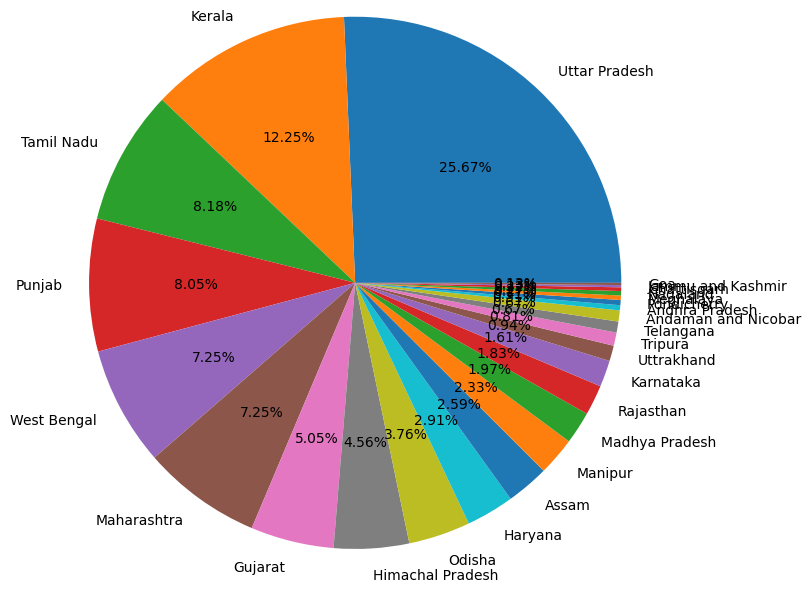

In [ ]:
plt.pie(data.state.value_counts(), labels=data.state.value_counts().index, radius=1.8, autopct="%0.2f%%")
plt.show()

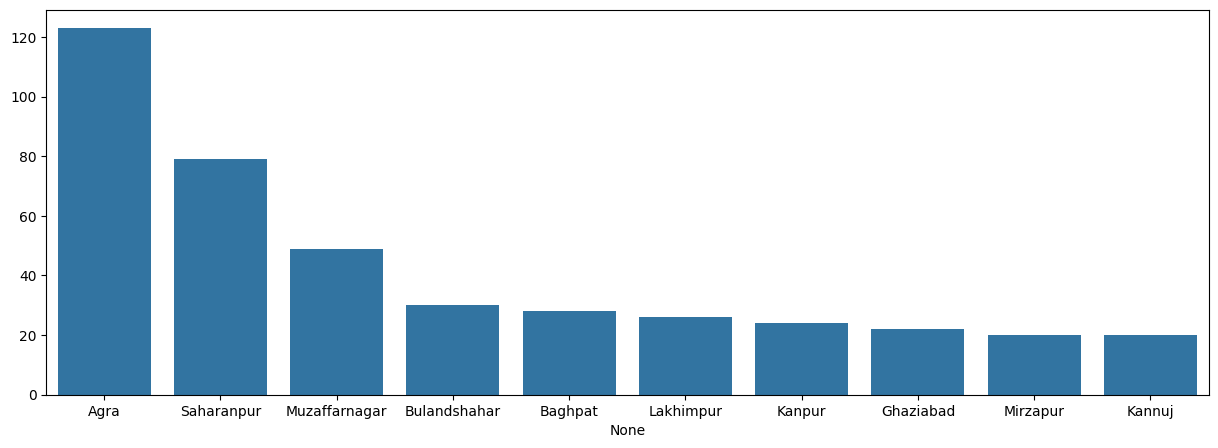

In [ ]:
values = data[data.state == 'Uttar Pradesh'].district.value_counts().to_list()[:10]
labels = data[data.state == 'Uttar Pradesh'].district.value_counts().index[:10]

plt.figure(figsize=(15, 5))
sns.barplot(x=labels, y=values)
plt.show()

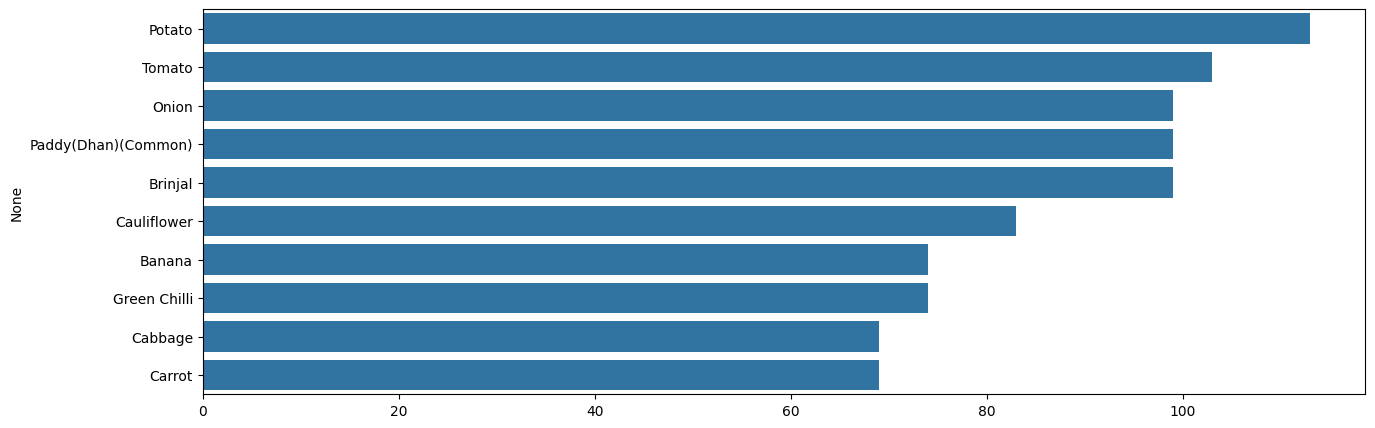

In [ ]:
#Which commodity is produced in large amount?
values = data.commodity.value_counts().to_list()[:10]
labels = data.commodity.value_counts().index[:10]

plt.figure(figsize=(15,5))
sns.barplot(x=values, y=labels)
plt.show()

##Step 4: Dimensionality Reduction

           min_price      max_price    modal_price           PC1           PC2
count    2236.000000    2236.000000    2236.000000  2.236000e+03  2.236000e+03
mean     2451.271914    2851.289356    2694.124329 -2.542192e-17 -1.016877e-16
std      3450.055096    3915.978829    3693.077586  2.144904e+00  1.796203e+00
min         0.000000       0.000000       2.000000 -2.530068e+00 -4.100435e+00
25%       800.000000    1000.000000     950.000000 -1.115152e+00 -1.965632e+00
50%      1700.000000    1957.500000    1830.000000 -4.225267e-01  3.658446e-01
75%      3200.000000    3700.000000    3500.000000  5.754342e-01  1.635492e+00
max    110000.000000  130000.000000  120000.000000  5.679827e+01  1.417625e+01
             min_price  max_price  modal_price           PC1           PC2
min_price     1.000000   0.975517     0.985323  9.560791e-01  6.123078e-02
max_price     0.975517   1.000000     0.994257  9.581759e-01  4.403888e-02
modal_price   0.985323   0.994257     1.000000  9.628059e-01  5.

<ipython-input-17-54e026179b86>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


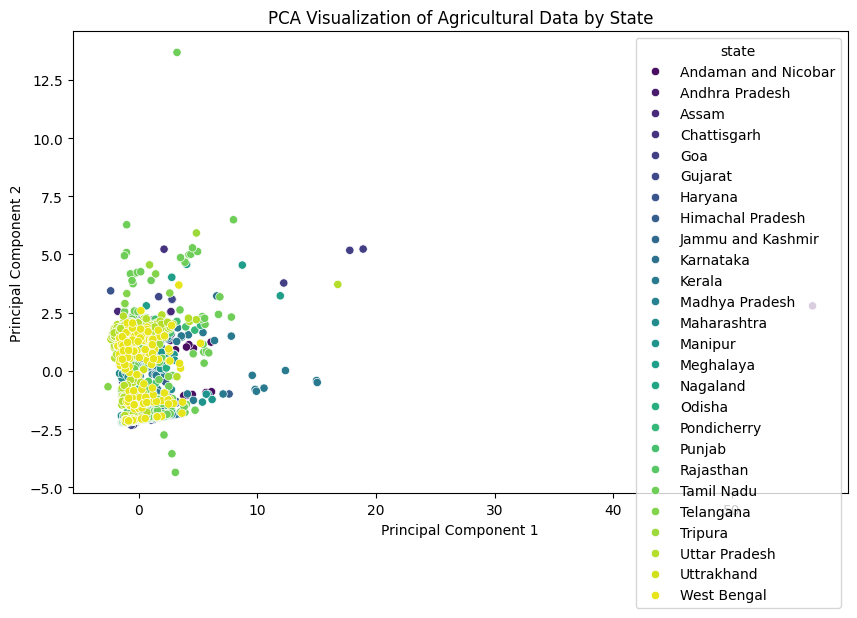

In [ ]:
#We'll apply PCA for dimensionality reduction after standardizing the data
#Preprocess categorical features using one-hot encoding
#Adding heatmap visualization
features = pd.get_dummies(data.drop(['state', 'district', 'arrival_date', 'commodity'], axis=1))

#Standardize the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
#Determine the maximum number of components based on the dimensions of your data
max_components = min(scaled_features.shape)

#Update PCA with the maximum number of components
pca = PCA(n_components=max_components)

principal_components = pca.fit_transform(scaled_features)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

#Statistical Analysis and Parameters
print(data.describe())

#Correlation
correlation_matrix = data.corr()
print(correlation_matrix)

#Regression
X = sm.add_constant(data['PC1'])  # Assuming PC1 as independent variable
Y = data['PC2']  # Assuming PC2 as dependent variable
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

#Hypothesis Analysis
#Testing if there's a significant difference in agricultural activities between two states
state1_data = data[data['state'] == 'Uttar Pradesh']
state2_data = data[data['state'] == 'Kerala']
t_stat, p_value = stats.ttest_ind(state1_data['modal_price'], state2_data['modal_price'])

if p_value < 0.05:
    print("There is a significant difference in agricultural activities between the two states.")
else:
    print("There is no significant difference in agricultural activities between the two states.")

#Apply PCA with at least two components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

#Update the DataFrame with principal components
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

#Advanced Multivariate Data Visualization
#PCA visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=data, hue='state', palette='viridis')
plt.title('PCA Visualization of Agricultural Data by State')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()